<a href="https://colab.research.google.com/github/AlinaElfimova/Boosting-models-to-differ-PA-PC-and-AA/blob/main/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Firstly, you have to install ANACONDA by this link https://www.anaconda.com/products/individual

**You have to click to image.png in the each code cell**

**This icon will appear after hovering over image.png in code cell**

Install catboost

In [ ]:
!pip install catboost

     |████████████████████████████████| 76.1 MB 1.2 MB/s 


Import your data

Data should be a **.csv table** () with columns:
1. 'Sex' - 1-female, 2-male
2. 'Age' - age at the time of surgery (years) *(the data should be in range 13-80)*
3. 'PTH' - PTH prior to administration of antiresorptive and calcimimetic therapy (pg/ml) *(the data should be in range 34.9-3338.2)*
4. 'AlbCa' - albumin-adjusted calcium prior to administration of antiresorptive and calcimimetic therapy (mmol/l) *(the data should be in range 1.6-6.52)*
5. 'Cai' - ionized calcium prior to administration of antiresorptive and calcimimetic therapy (mmol/l) *(the data should be in range 0.97-2.52)*
6. 'P' - phosphorus prior to administration of antiresorptive and calcimimetic therapy (mmol/l) *(the data should be in range 0.2-1.93)*
7. 'GFR60' - decrease in GFR below 60 ml/min/1.73 m2 before surgery (1-yes, 0-no)
8. 'Kidney' - nephrolithiasis or chronic kidney disease before surgery (1-yes, 0-no)
9. 'Bone' - low-energy fractures or osteoporosis (according to bone mineral density measurement) (1-yes, 0-no)
10. 'Diametre' - the largest size of the tumor according to ultrasound (mm) *(the data should be in range 3.1-80)*
11. 'Volume' - volume of the tumor according to ultrasound (cm3) *(the data should be in range 0-81.6)*

**You can download the table with necessary heads (file 'Data').**

In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
import io
df = pd.read_csv(io.BytesIO(uploaded['Data.csv']), sep = ";")
df

Saving Data.csv to Data.csv


,Sex,Age,PTH,AlbCa,Cai,P,GFR60,Kidney,Bone,Diametre,Volume
0,1,64,573.5,3.04,1.49,0.94,1,1,1,27,2.160513


Check the format of entered values

In [ ]:
i=0
for i in range(len(df.index)):
  if df['Sex'][i] == 1 or df['Sex'][i] == 2:
    print("'Sex' data is correct.")
  else:
    print("Invalid format for 'Sex'. The result won`t be correct. Please, check the entered value.")
  if df['Age'][i] >= 13 and df['Age'][i] <= 80:
    print("'Age' data is correct.")
  else:
    print("Invalid format for 'Age'. The result won`t be correct. Please, check the entered value.")
  if df['PTH'][i] >=34.9 and df['PTH'][i] <= 3338.22:
    print("'PTH' data is correct.")
  else:
    print("Invalid format for 'PTH'. The result won`t be correct. Please, check the entered value.")
  if df['AlbCa'][i] >= 1.6 and df['AlbCa'][i] <= 6.52:
    print("'AlbCa' data is correct.")
  else:
    print("Invalid format for 'AlbCa'. The result won`t be correct. Please, check the entered value.")
  if df['Cai'][i] >= 0.97 and df['Cai'][i] <= 2.52:
    print("'Cai' data is correct.")
  else:
    print("Invalid format for 'Cai'. The result won`t be correct. Please, check the entered value.")
  if df['P'][i] >= 0.2 and df['P'][i] <=1.93:
    print("'P' data is correct.")
  else:
    print("Invalid format for 'P'. The result won`t be correct. Please, check the entered value.")
  if df['GFR60'][i] == 1 or df['GFR60'][i] == 0:
    print("'GFR60' data is correct.")
  else:
    print("Invalid format for 'GFR60'. The result won`t be correct. Please, check the entered value.")
  if df['Kidney'][i] == 1 or df['Kidney'][i] == 0:
    print("'Kidney' data is correct.")
  else:
    print("Invalid format for 'Kidney'. The result won`t be correct. Please, check the entered value.")
  if df['Bone'][i] == 1 or df['Bone'][i] == 0:
    print("'Bone' data is correct.")
  else:
    print("Invalid format for 'Bone'. The result won`t be correct. Please, check the entered value.")
  if df['Diametre'][i] > 3.1 and df['Diametre'][i] <= 80:
    print("'Diametre' data is correct.")
  else:
    print("Invalid format for 'Diametre'. The result won`t be correct. Please, check the entered value.")
  if df['Volume'][i] >= 0 and df['Volume'][i] <= 81.6:
    print("'Volume' data is correct.")
  else:
    print("Invalid format for 'Volume'. The result won`t be correct. Please, check the entered value.")

'Sex' data is correct.
'Age' data is correct.
'PTH' data is correct.
'AlbCa' data is correct.
'Cai' data is correct.
'P' data is correct.
'GFR60' data is correct.
'Kidney' data is correct.
'Bone' data is correct.
'Diametre' data is correct.
'Volume' data is correct.


In [ ]:
X1 = df.loc[:, df.columns != 'Kidney']

**You may load Google Colab session storage files 'catboost_PC+AA vs PA.joblib' and 'catboost_PC vs AA'**

1. At the first step you should download these files from GitHub repository
2. Load these files according the screenshot

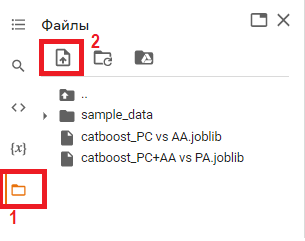
3. After you can see these files like on the screenshot

In [ ]:
from joblib import dump, load
loaded_model1 = load('/content/catboost_PC AA vs PA.joblib')
from sklearn.metrics import confusion_matrix

predicted1=loaded_model1.predict(X1)

After executing the code in the cell below, you can see the result (column "Diagnosis") of the differential diagnotics of PA from AA and PC

**If you received "PA", you have accepted the final result and may stop using the model**

In [ ]:
predicted1
diagnosis = {1 : "PC or AA", 0 : "PA"}
df["predicted1"] = predicted1.tolist()
df["Diagnosis"] = df["predicted1"].map(diagnosis)
df

,Sex,Age,PTH,AlbCa,Cai,P,GFR60,Kidney,Bone,Diametre,Volume,predicted1,Diagnosis
0,1,64,573.5,3.04,1.49,0.94,1,1,1,27,2.160513,0,PA


In [ ]:
df=df.loc[df['predicted1'] == 1]

In [ ]:
X2 = df.drop(columns= ['predicted1', 'Diagnosis'], axis=1)

In [ ]:
from joblib import dump, load
loaded_model2 = load('/content/catboost_PC vs AA.joblib')
from sklearn.metrics import confusion_matrix

predicted2=loaded_model2.predict(X2)

After executing the code in the cell below, you can see the result (column "Diagnosis") of the differential diagnotics between PC and AA

**You have accepted the final result**

In [ ]:
predicted2
diagnosis = {1 : "PC", 0 : "AA"}
X2["predicted2"] = predicted2.tolist()
X2["Diagnosis"] = X2["predicted2"].map(diagnosis)
X2

,Sex,Age,PTH,AlbCa,Cai,P,GFR60,Kidney,Bone,Diametre,Volume,predicted2,Diagnosis
0,3,54,65,2.4,2.5,0.85,0,0,1,48,18.8,1,PC
